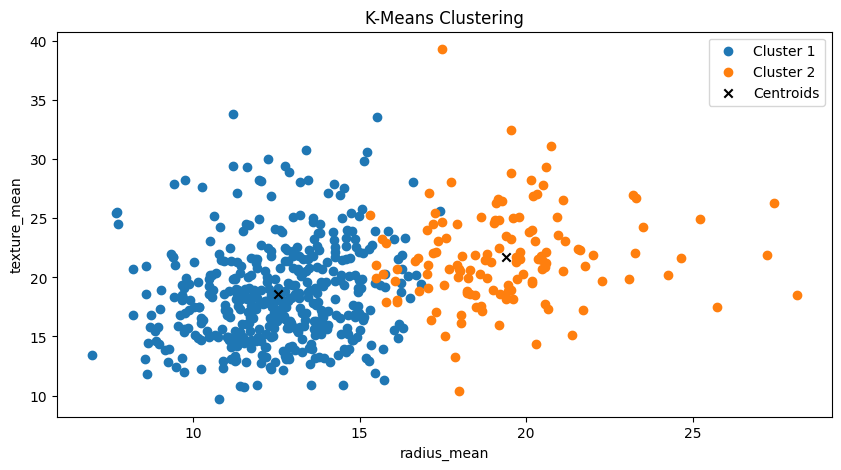

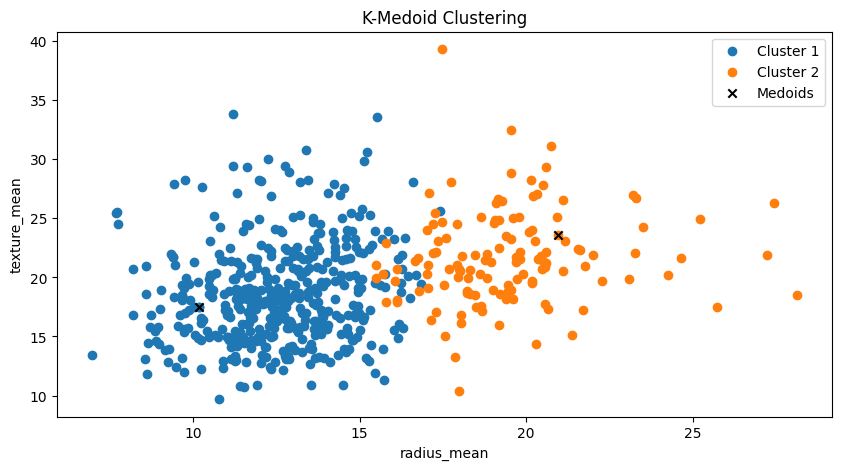

K-Means - Cluster 1: 438 points
K-Medoids - Cluster 1: 440 points
K-Means - Cluster 2: 131 points
K-Medoids - Cluster 2: 129 points


In [4]:
import csv
import random
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = []
with open("/content/cancer (1).csv", "r") as csvfile:
    reader = csv.reader(csvfile)
    headers = next(reader)  # Skip the header
    for row in reader:
        data.append([float(val) for val in row[2:]])  # Exclude 'id' and 'diagnosis'

# Convert the data to a numpy array
data = np.array(data)

# Define the number of clusters
num_clusters = 2

# Define a function to compute the distance between two points
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# K-Means clustering algorithm
def k_means(data, num_clusters, num_iterations=100):
    # Initialize cluster centers randomly
    cluster_centers = data[random.sample(range(len(data)), num_clusters)]

    for _ in range(num_iterations):
        # Assign each point to the nearest cluster
        labels = np.argmin(np.array([[euclidean_distance(point, center) for center in cluster_centers] for point in data]), axis=1)

        # Update cluster centers
        new_centers = np.array([data[labels == i].mean(axis=0) for i in range(num_clusters)])

        # Check for convergence
        if np.all(new_centers == cluster_centers):
            break

        cluster_centers = new_centers

    return labels, cluster_centers

# K-Medoid clustering algorithm
def k_medoid(data, num_clusters, num_iterations=100):
    # Initialize medoids randomly
    medoids = random.sample(range(len(data)), num_clusters)

    for _ in range(num_iterations):
        # Assign each point to the nearest medoid
        labels = np.argmin(np.array([[euclidean_distance(data[point], data[medoid]) for medoid in medoids] for point in range(len(data))]), axis=1)

        # Update medoids
        new_medoids = np.array([np.where(labels == i)[0][np.argmin(np.sum(np.abs(data[labels == i] - data[point]), axis=1))] for i, point in enumerate(medoids)])

        # Check for convergence
        if np.all(new_medoids == medoids):
            break

        medoids = new_medoids

    return labels, data[medoids]

# Perform K-Means clustering
kmeans_labels, kmeans_centers = k_means(data, num_clusters)

# Perform K-Medoid clustering
kmedoid_labels, kmedoid_centers = k_medoid(data, num_clusters)

# Plot the clusters for K-Means
plt.figure(figsize=(10, 5))
for i in range(num_clusters):
    cluster_data = data[kmeans_labels == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {i + 1}')
plt.scatter(kmeans_centers[:, 0], kmeans_centers[:, 1], marker='x', color='black', label='Centroids')
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

# Plot the clusters for K-Medoids
plt.figure(figsize=(10, 5))
for i in range(num_clusters):
    cluster_data = data[kmedoid_labels == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {i + 1}')
plt.scatter(kmedoid_centers[:, 0], kmedoid_centers[:, 1], marker='x', color='black', label='Medoids')
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.title('K-Medoid Clustering')
plt.legend()
plt.show()

# Count the number of points belonging to each cluster
for i in range(num_clusters):
    print(f'K-Means - Cluster {i + 1}: {np.sum(kmeans_labels == i)} points')
    print(f'K-Medoids - Cluster {i + 1}: {np.sum(kmedoid_labels == i)} points')